In [1]:
# Aggregate plots centered at peak summits or CTCF motifs
# 1. takes file: .mcool file and loop file
#    applies tool: cooler and cooltools
#    produces output: Aggregate plots


# If you are a developer, you may want to reload the packages on the fly
# Jupyter has a magic for this particular purpose

%load_ext autoreload
%autoreload 2

# import standard python libraries

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

# import libraries for biological data analysis

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
# set resolution
# load cool file

resolution = 5000
clr_1 = cooler.Cooler(f'DNaseC_R3D7_DMSO4h.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'DNaseC_R3D7_dTAG2h.mcool::/resolutions/{resolution}')
clr_3 = cooler.Cooler(f'DNaseC_R3D7_dTAG4h.mcool::/resolutions/{resolution}')

#clr = cooler.Cooler(f'DNaseC_293T_siSCR_R1r0_val_trimLk3.5kb.cool')
#clr_RAD21_KD = cooler.Cooler(f'DNaseC_293T_siRAD21_R1r0_val_trimLk3.5kb.cool')

In [3]:
# Use bioframe to fetch the genomic features

hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

# Select only chromosomes that are present in the cooler

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

# call this to automaticly assign names to chromosomal arms

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [4]:
# load CTCF motif coordinates

#sites = bioframe.read_table('/mnt/disk4/public/RefBed/NR/Hs_NR.motif', schema='bed')
#sites = bioframe.read_table('/mnt/disk1/6/lxk/private/HiChIP/Total_HiChIP/293T/dimer/homer/CTCF/pair_class/CTCF-X/AGGTCA/profile/AGGTCA_u.motif', schema='bed')
sites = bioframe.read_table('/mnt/disk1/6/lxk/private/optionData/function_motif/HEK293T_CTCF_RAD21_DNase.motif', schema='bed')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

/usr/local/lib/python3.8/site-packages/bioframe/io/fileops.py:73: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


In [5]:
# perform pileups

pup_1 = coolpup.pileup(clr_1, sites, features_format='bed', view_df=hg38_arms, local=True,
                        flip_negative_strand=True, nshifts=10,
                        flank=500000, min_diag=2, nproc=80)

INFO:coolpuppy:('chr15_p', 'chr15_p'): 1
INFO:coolpuppy:('chr22_p', 'chr22_p'): 13
INFO:coolpuppy:('chr21_p', 'chr21_p'): 33
INFO:coolpuppy:('chrY_p', 'chrY_p'): 57
INFO:coolpuppy:('chrY_q', 'chrY_q'): 100
INFO:coolpuppy:('chr18_p', 'chr18_p'): 560
INFO:coolpuppy:('chr9_p', 'chr9_p'): 1209
INFO:coolpuppy:('chr12_p', 'chr12_p'): 1232
INFO:coolpuppy:('chr10_p', 'chr10_p'): 1273
INFO:coolpuppy:('chr17_p', 'chr17_p'): 1262
INFO:coolpuppy:('chr21_q', 'chr21_q'): 1260
INFO:coolpuppy:('chr5_p', 'chr5_p'): 1222
INFO:coolpuppy:('chr20_p', 'chr20_p'): 1182
INFO:coolpuppy:('chrX_p', 'chrX_p'): 1416
INFO:coolpuppy:('chr8_p', 'chr8_p'): 1589
INFO:coolpuppy:('chr16_p', 'chr16_p'): 1870
INFO:coolpuppy:('chr11_p', 'chr11_p'): 1900
INFO:coolpuppy:('chr4_p', 'chr4_p'): 1817
INFO:coolpuppy:('chrX_q', 'chrX_q'): 1940
INFO:coolpuppy:('chr18_q', 'chr18_q'): 1754
INFO:coolpuppy:('chr20_q', 'chr20_q'): 2444
INFO:coolpuppy:('chr7_p', 'chr7_p'): 2412
INFO:coolpuppy:('chr16_q', 'chr16_q'): 2395
INFO:coolpuppy:('

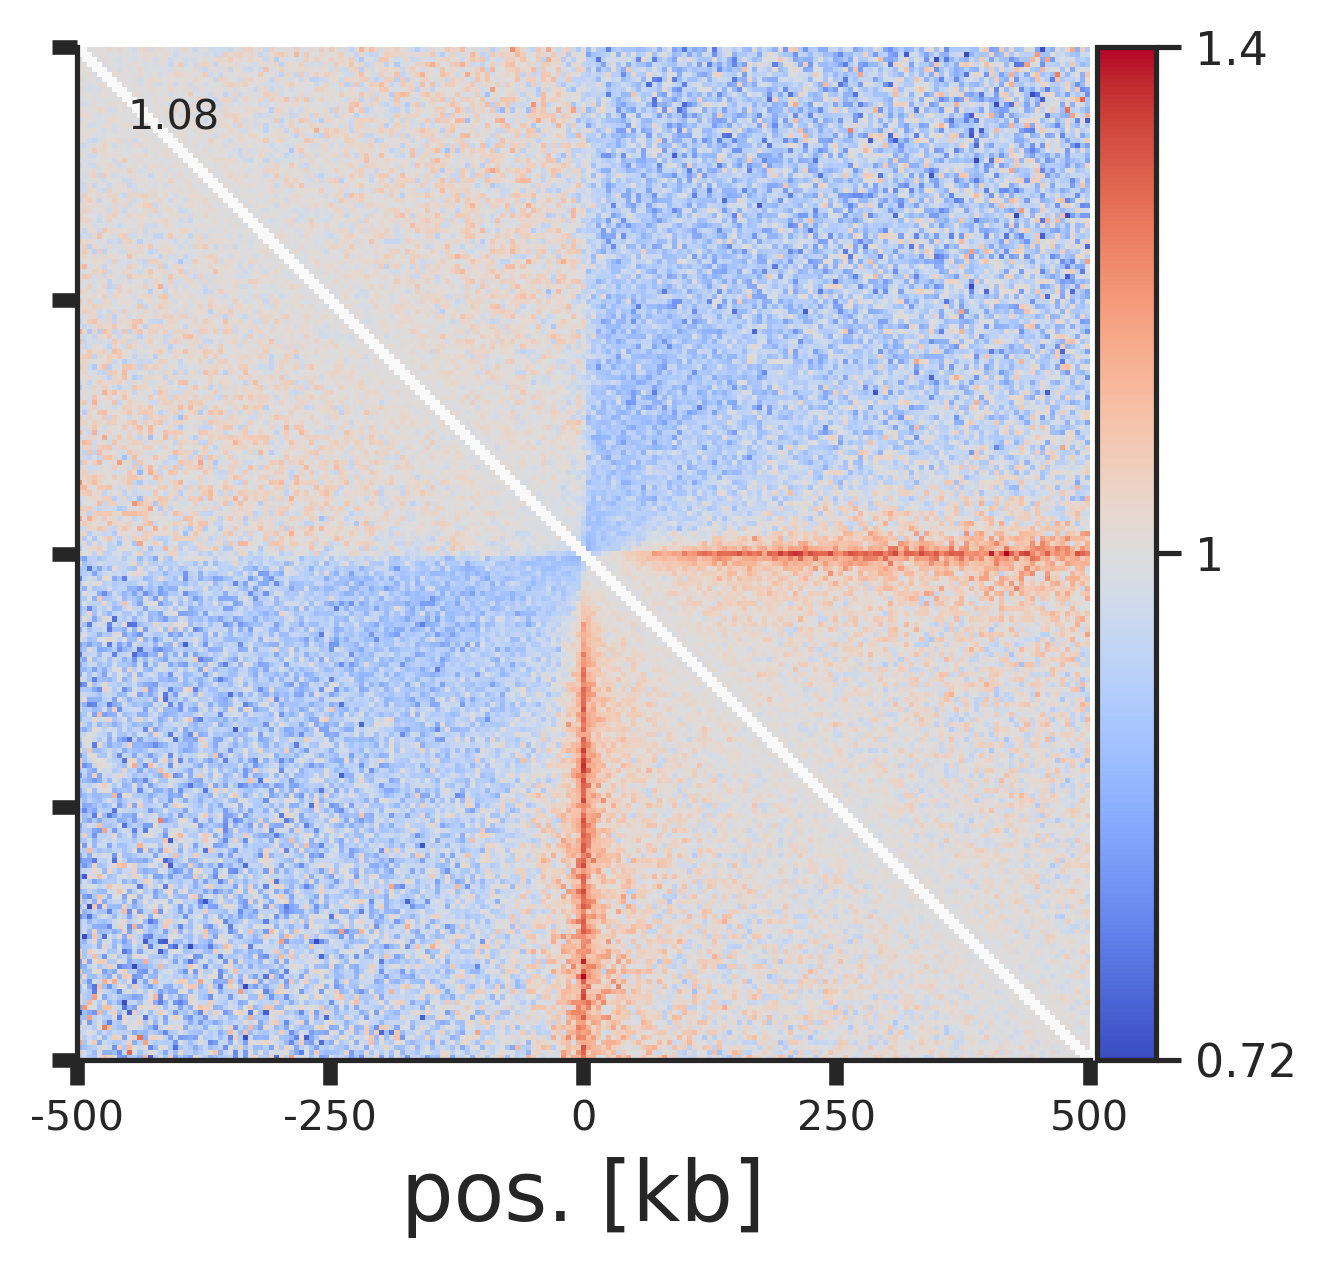

In [6]:
# visualize

plotpup.plot(pup_1,
            score=True, cmap='coolwarm', scale='log',
             sym=True, 
#              vmax=1.3,
#              vmin=0.78,
             height=5, 
             plot_ticks=True)

In [7]:
# perform pileups

pup_3 = coolpup.pileup(clr_3, sites, features_format='bed', view_df=hg38_arms, local=True,
                        flip_negative_strand=True, nshifts=10,
                        flank=500000, min_diag=2, nproc=80)

INFO:coolpuppy:('chr15_p', 'chr15_p'): 1
INFO:coolpuppy:('chr22_p', 'chr22_p'): 13
INFO:coolpuppy:('chr21_p', 'chr21_p'): 33
INFO:coolpuppy:('chrY_p', 'chrY_p'): 57
INFO:coolpuppy:('chrY_q', 'chrY_q'): 100
INFO:coolpuppy:('chr18_p', 'chr18_p'): 560
INFO:coolpuppy:('chr20_p', 'chr20_p'): 1182
INFO:coolpuppy:('chr21_q', 'chr21_q'): 1260
INFO:coolpuppy:('chr17_p', 'chr17_p'): 1262
INFO:coolpuppy:('chr9_p', 'chr9_p'): 1209
INFO:coolpuppy:('chr10_p', 'chr10_p'): 1273
INFO:coolpuppy:('chrX_p', 'chrX_p'): 1416
INFO:coolpuppy:('chr5_p', 'chr5_p'): 1222
INFO:coolpuppy:('chr12_p', 'chr12_p'): 1232
INFO:coolpuppy:('chr4_p', 'chr4_p'): 1817
INFO:coolpuppy:('chrX_q', 'chrX_q'): 1940
INFO:coolpuppy:('chr8_p', 'chr8_p'): 1589
INFO:coolpuppy:('chr18_q', 'chr18_q'): 1754
INFO:coolpuppy:('chr11_p', 'chr11_p'): 1900
INFO:coolpuppy:('chr16_p', 'chr16_p'): 1870
INFO:coolpuppy:('chr13_q', 'chr13_q'): 2621
INFO:coolpuppy:('chr6_p', 'chr6_p'): 2446
INFO:coolpuppy:('chr19_p', 'chr19_p'): 2325
INFO:coolpuppy:('

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


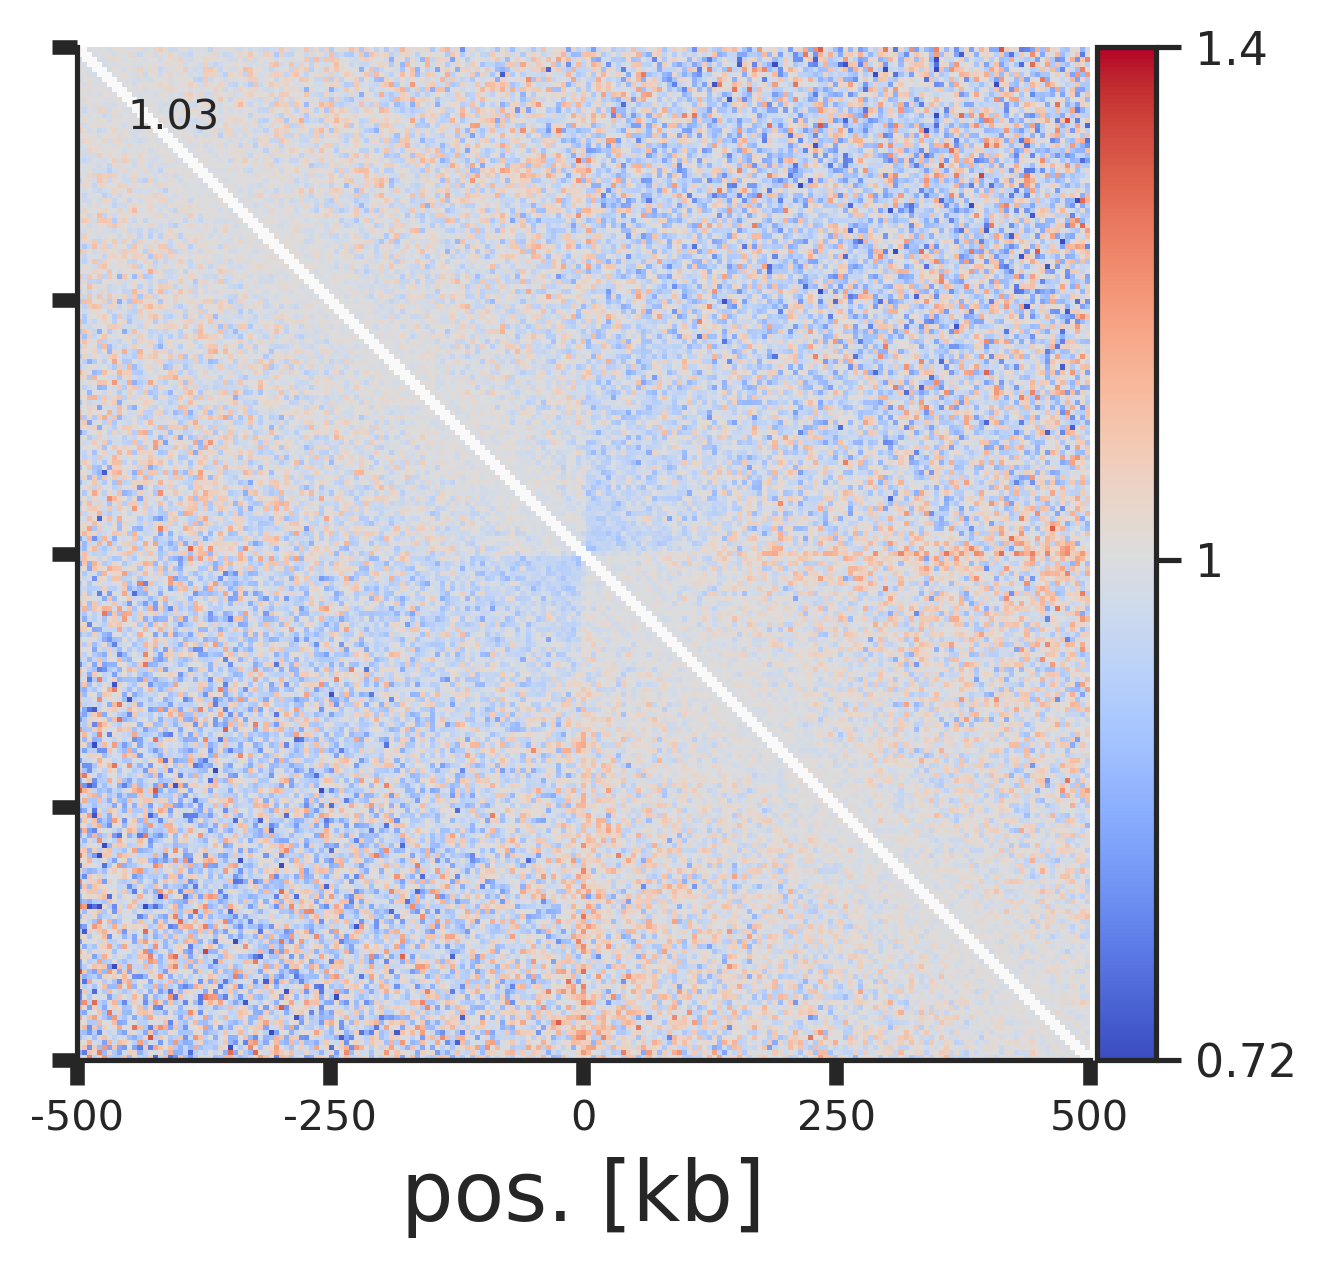

In [9]:
# visualize

plotpup.plot(pup_3,
            score=True, cmap='coolwarm', scale='log',
             sym=True, 
             vmax=1.4,
             vmin=0.72,
             height=5, 
             plot_ticks=True)